In [0]:
# In[1]:
import pandas as pd
import numpy as np


# In[2]:
#Read the dataset in csv
tweets = pd.read_csv('/content/sample_data/Tweets.csv', sep=',')


# In[3]:
#show the first 10 lines
tweets.head(10)


# In[3]:
#Filter for the category
is_positive = tweets['airline_sentiment'].str.contains("positive")
is_negative = tweets['airline_sentiment'].str.contains("negative")
is_neutral = tweets['airline_sentiment'].str.contains("neutral")


# In[4]:
positive_tweets = tweets[is_positive]
positive_tweets.shape


# In[5]:
negative_tweets = tweets[is_negative]
negative_tweets.shape


# In[6]:
neutral_tweets = tweets[is_neutral]
neutral_tweets.shape


# In[34]:
worst_airline = negative_tweets[['airline','airline_sentiment_confidence','negativereason']]

,airline,airline_sentiment_confidence,negativereason
3,Virgin America,1.0000,Bad Flight
4,Virgin America,1.0000,Can't Tell
5,Virgin America,1.0000,Can't Tell
15,Virgin America,0.6842,Late Flight
17,Virgin America,1.0000,Bad Flight
20,Virgin America,0.6705,Can't Tell
24,Virgin America,1.0000,Customer Service Issue
25,Virgin America,1.0000,Customer Service Issue
26,Virgin America,1.0000,Can't Tell
28,Virgin America,1.0000,Bad Flight


In [0]:
# In[7]:
# Create the rank for the best airline
best_airline = positive_tweets[['airline','airline_sentiment_confidence']]
cnt_best_airline = best_airline.groupby('airline', as_index=False).count()
df2 = cnt_best_airline.sort_values('airline_sentiment_confidence', ascending=False)
df2

,airline,airline_sentiment_confidence
2,Southwest,570
1,Delta,544
4,United,492
0,American,336
3,US Airways,269
5,Virgin America,152


In [0]:
# In[37]:
# Create the rank for the worst airline
cnt_worst_airline = worst_airline.groupby('airline', as_index=False).count()
df1 = cnt_worst_airline.sort_values('negativereason', ascending=False)
df1

,airline,airline_sentiment_confidence,negativereason
4,United,2633,2633
3,US Airways,2263,2263
0,American,1960,1960
2,Southwest,1186,1186
1,Delta,955,955
5,Virgin America,181,181


In [0]:
# In[11]:
# Create the rank for negative reason
motivation = negative_tweets[['airline','negativereason']]
cnt_bad_flight_motivation = motivation.groupby('negativereason', as_index=False).count()
df3 = cnt_bad_flight_motivation.sort_values('negativereason', ascending=False)
df3

,negativereason,airline
9,longlines,178
8,Lost Luggage,724
7,Late Flight,1665
6,Flight Booking Problems,529
5,Flight Attendant Complaints,481
4,Damaged Luggage,74
3,Customer Service Issue,2910
2,Cancelled Flight,847
1,Can't Tell,1190
0,Bad Flight,580


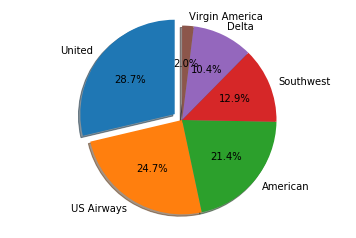

In [0]:
import matplotlib.pyplot as plt
 
# Data to plot
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red', 'yellow']
explode = (0.1, 0, 0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(df1.negativereason, explode=explode, labels=df1.airline, 
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

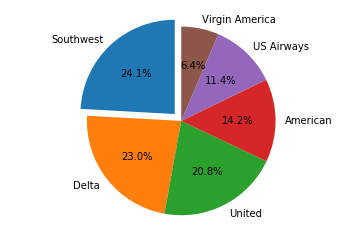

In [0]:
# Plot
plt.pie(df2.airline_sentiment_confidence, explode=explode, labels=df2.airline, 
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

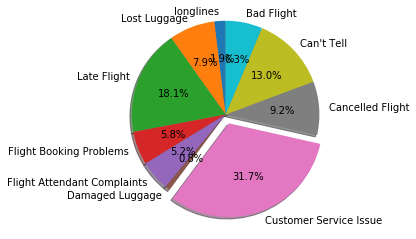

In [0]:
# Plot
explode = (0, 0, 0, 0,0,0,0.1,0,0,0)

plt.pie(df3.airline, explode=explode, labels=df3.negativereason, 
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()